In [5]:
import pandas as pd
import numpy as np     # 데이터를 저장하고 처리하는 패키지
import matplotlib as mpl           # 그래프를 그리는 패키지
import matplotlib.pyplot as plt 
import warnings


df_24h = pd.read_csv("dataset/btc_24h.csv")
df = pd.read_csv("dataset/krw_btc.csv")
dff = df['open']
dff_array = np.array(dff)
dff_array = dff_array.reshape(2358,24)
col_name =["price0","price1","price2","price3","price4","price5","price6","price7","price8","price9","price10","price11","price12","price13","price14","price15","price16","price17","price18","price19","price20","price21","price22","price23"]
df_24h = pd.DataFrame(dff_array,columns=col_name)


In [8]:
warnings.filterwarnings(action='ignore')
col_name =["price0","price1","price2","price3","price4","price5",\
           "price6","price7","price8","price9","price10","price11",\
            "price12","price13","price14","price15","price16","price17",\
            "price18","price19","price20","price21","price22","price23"]

start_time = 1
end_time = 100

start_money = df_24h['price0'][start_time]
simul_list = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]

btc = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
money = []

for i in range(len(simul_list)):
    simul_list[i].append(start_money)
    money.append(start_money)

for j in range(start_time+1,end_time):
    for i in range(len(simul_list)):
        if df_24h[col_name[i]][j] >= df_24h[col_name[i]][j-1] or (df_24h[col_name[i]][j]-df_24h[col_name[i]][j-1])/df_24h[col_name[i]][j-1] < -0.1:
            if money[i] != 0:
                simul_list[i].append(int(money[i]))
                btc[i] = money[i]/float(df_24h[col_name[i]][j])*0.9995
                money[i] = 0
            
            else:
               simul_list[i].append(int(btc[i]*df_24h[col_name[i]][j]))
               
        elif df_24h[col_name[i]][j] < df_24h[col_name[i]][j-1]:
            if btc[i] != 0:
                money[i] = btc[i]*float(df_24h[col_name[i]][j])*0.9995
                simul_list[i].append(int(money[i]))
                btc[i] = 0
            else:
                simul_list[i].append(int(money[i]))

simul_array = np.array(simul_list)
simul_df = pd.DataFrame(simul_array.T, columns=col_name)
simul_df['open'] = list(df_24h['price0'][start_time:end_time])

simul_log_df =np.log10(simul_df/simul_df['open'][0])

dfdf = simul_df.shift(1)
simul_per_df = 100*(simul_df-dfdf)/dfdf

for i in range(len(simul_list)):
    simul_per_df[col_name[i]][0]= 0.000000
simul_per_df['open'][0]=0.000000


final_list = []
a = end_time - start_time
for j in range(2,a):
    final = np.zeros(25)
    simul_mini_per_df = simul_per_df[:j+1].copy()
    for i in range(len(simul_list)):
        if simul_mini_per_df[col_name[i]][len(simul_mini_per_df)-1] == 0.000000:
            simul_mini_per_df[col_name[i]][len(simul_mini_per_df)-1] = -0.000001
    for k in range(1,j):
        final += np.array(simul_mini_per_df[k:].mean()/simul_mini_per_df[k:].std())
    final_now = final/(j-1)
    final_list.append(final_now)
    
    print(j,"th finish!")
final_array = np.array(final_list)
final_df = pd.DataFrame(final_array, columns = col_name + ['open'])
final_df


2 th finish!
3 th finish!
4 th finish!
5 th finish!
6 th finish!
7 th finish!
8 th finish!
9 th finish!
10 th finish!
11 th finish!
12 th finish!
13 th finish!
14 th finish!
15 th finish!
16 th finish!
17 th finish!
18 th finish!
19 th finish!
20 th finish!
21 th finish!
22 th finish!
23 th finish!
24 th finish!
25 th finish!
26 th finish!
27 th finish!
28 th finish!
29 th finish!
30 th finish!
31 th finish!
32 th finish!
33 th finish!
34 th finish!
35 th finish!
36 th finish!
37 th finish!
38 th finish!
39 th finish!
40 th finish!
41 th finish!
42 th finish!
43 th finish!
44 th finish!
45 th finish!
46 th finish!
47 th finish!
48 th finish!
49 th finish!
50 th finish!
51 th finish!
52 th finish!
53 th finish!
54 th finish!
55 th finish!
56 th finish!
57 th finish!
58 th finish!
59 th finish!
60 th finish!
61 th finish!
62 th finish!
63 th finish!
64 th finish!
65 th finish!
66 th finish!
67 th finish!
68 th finish!
69 th finish!
70 th finish!
71 th finish!
72 th finish!
73 th finish!


,price0,price1,price2,price3,price4,price5,price6,price7,price8,price9,...,price15,price16,price17,price18,price19,price20,price21,price22,price23,open
0,0.707107,0.707107,0.707107,0.707107,0.707107,-0.707107,0.707107,0.707107,0.707107,-0.707107,...,-0.707107,-0.707107,-0.707107,-0.707107,-0.707107,0.707107,0.707107,0.707107,0.707107,1.089200
1,1.044429,1.638535,4.985214,1.684360,1.090216,-0.642230,1.149598,0.977657,1.124956,-0.642229,...,-0.642229,-0.642229,-0.642229,-0.642229,-0.642229,2.612221,3.318763,1.436111,1.257482,1.463067
2,11.142372,2.341310,4.460120,1.598944,1.340190,0.498128,1.767736,1.208462,0.763781,0.440366,...,0.155245,0.114449,0.192193,0.212720,0.211067,2.047774,1.401505,1.507050,10.049636,11.467603
3,3.971629,2.548800,7.651531,2.422659,1.894736,0.981184,1.649755,1.564042,1.218278,0.746402,...,1.140721,0.968240,1.377436,1.135701,1.270144,4.489055,1.780061,20.938362,2.324497,4.212044
4,2.598126,3.868764,4.725678,3.473894,2.623398,1.522039,2.209740,17.182694,1.140681,1.860228,...,0.381089,0.384293,0.151981,0.275059,0.162475,0.399523,0.434715,0.287574,0.256367,2.790607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,0.252125,0.319815,0.332683,0.308386,0.279538,0.323722,0.353421,0.242850,0.255205,0.187857,...,0.056715,0.049129,0.024618,0.049535,-0.004970,0.095993,0.142985,0.129770,0.237039,0.154325
93,0.242077,0.305417,0.318426,0.294512,0.267415,0.310835,0.338763,0.232608,0.244900,0.179735,...,0.053182,0.046295,0.022578,0.046341,-0.028374,0.089188,0.136364,0.123741,0.227208,0.090529
94,0.232601,0.292345,0.305411,0.281910,0.256011,0.298555,0.325357,0.222706,0.234484,0.171551,...,0.049630,0.043059,0.019842,0.042707,-0.026216,0.122439,0.129934,0.157111,0.248499,0.153409
95,0.220289,0.276908,0.275746,0.255315,0.224547,0.265185,0.292086,0.194474,0.208256,0.147643,...,0.034142,0.024841,0.006453,0.033937,-0.042277,0.121414,0.162945,0.242599,0.274018,0.156648


In [7]:
final_df = pd.read_csv("dataset/final_df.csv")
del final_df['Unnamed: 0']
final_df1 = final_df.copy()
del final_df1['open']

pddd1=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
pddd2=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
pddd3=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
pddd4=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
pddd5=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
pddd6=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
pdddd1=[]
pdddd2=[]
pdddd3=[]
pdddd4=[]
pdddd5=[]
pdddd6=[]

simul_list = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]


for i in range(1500,len(final_df1)):
    pddd1[np.argmax(final_df1.T[i])]+=1.0
    pdddd1.append(np.argmax(final_df1.T[i]))
    final_df1[col_name[np.argmax(final_df1.T[i])]][i] = -100
    pddd2[np.argmax(final_df1.T[i])]+=1.0
    pdddd2.append(np.argmax(final_df1.T[i]))
    final_df1[col_name[np.argmax(final_df1.T[i])]][i] = -100
    pddd3[np.argmax(final_df1.T[i])]+=1.0
    pdddd3.append(np.argmax(final_df1.T[i]))
    final_df1[col_name[np.argmax(final_df1.T[i])]][i] = -100
    pddd4[np.argmax(final_df1.T[i])]+=1.0
    pdddd4.append(np.argmax(final_df1.T[i]))
    final_df1[col_name[np.argmax(final_df1.T[i])]][i] = -100
    pddd5[np.argmax(final_df1.T[i])]+=1.0
    pdddd5.append(np.argmax(final_df1.T[i]))
    final_df1[col_name[np.argmax(final_df1.T[i])]][i] = -100
    pddd6[np.argmax(final_df1.T[i])]+=1.0
    pdddd6.append(np.argmax(final_df1.T[i]))
    for j in range(24):
        simul_list[j].append((1*pddd1[j]+0*pddd2[j]+0*pddd3[j]+0*pddd4[j])/(1*i))


print(pddd1)
print(pddd2)
print(pddd3)
print(pddd4)
print(pddd5)
print(pddd6,"\n")
"""print(pdddd1)
print(pdddd2)
print(pdddd3)
print(pdddd4)
print(pdddd5)
print(pdddd6)"""

print(simul_list)


simul_array = np.array(simul_list)
simul_df = pd.DataFrame(simul_array.T, columns=col_name)
len(simul_df)


[30.0, 1.0, 3.0, 24.0, 0, 0, 1.0, 212.0, 359.0, 179.0, 1.0, 2.0, 0, 1.0, 0, 1.0, 4.0, 0, 1.0, 1.0, 3.0, 0, 0, 1.0]
[62.0, 2.0, 0, 111.0, 0, 12.0, 0, 117.0, 138.0, 354.0, 3.0, 8.0, 1.0, 0, 0, 1.0, 0, 2.0, 0, 2.0, 1.0, 1.0, 0, 9.0]
[148.0, 13.0, 0, 115.0, 8.0, 32.0, 8.0, 154.0, 95.0, 119.0, 60.0, 34.0, 0, 0, 0, 2.0, 2.0, 3.0, 0, 1.0, 3.0, 0, 0, 27.0]
[97.0, 51.0, 0, 139.0, 30.0, 53.0, 32.0, 107.0, 100.0, 71.0, 37.0, 46.0, 0, 1.0, 0, 1.0, 12.0, 10.0, 0, 3.0, 4.0, 8.0, 3.0, 19.0]
[99.0, 42.0, 0, 85.0, 35.0, 151.0, 51.0, 78.0, 43.0, 37.0, 32.0, 71.0, 0, 0, 0, 1.0, 18.0, 14.0, 2.0, 11.0, 6.0, 5.0, 4.0, 39.0]
[50.0, 65.0, 1.0, 156.0, 45.0, 124.0, 76.0, 34.0, 21.0, 30.0, 44.0, 48.0, 0, 0, 0, 3.0, 24.0, 26.0, 0, 8.0, 5.0, 17.0, 10.0, 37.0] 

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.000664451827242525, 0.0006640106241699867, 0.0006635700066357001, 0.000663129973474801, 0.0006626905235255136, 0.0006622516556291391, 0.0006618133686300463, 0.0006613756613756613, 0.0006609385327164573, 0.0006605019815059445, 0.

824

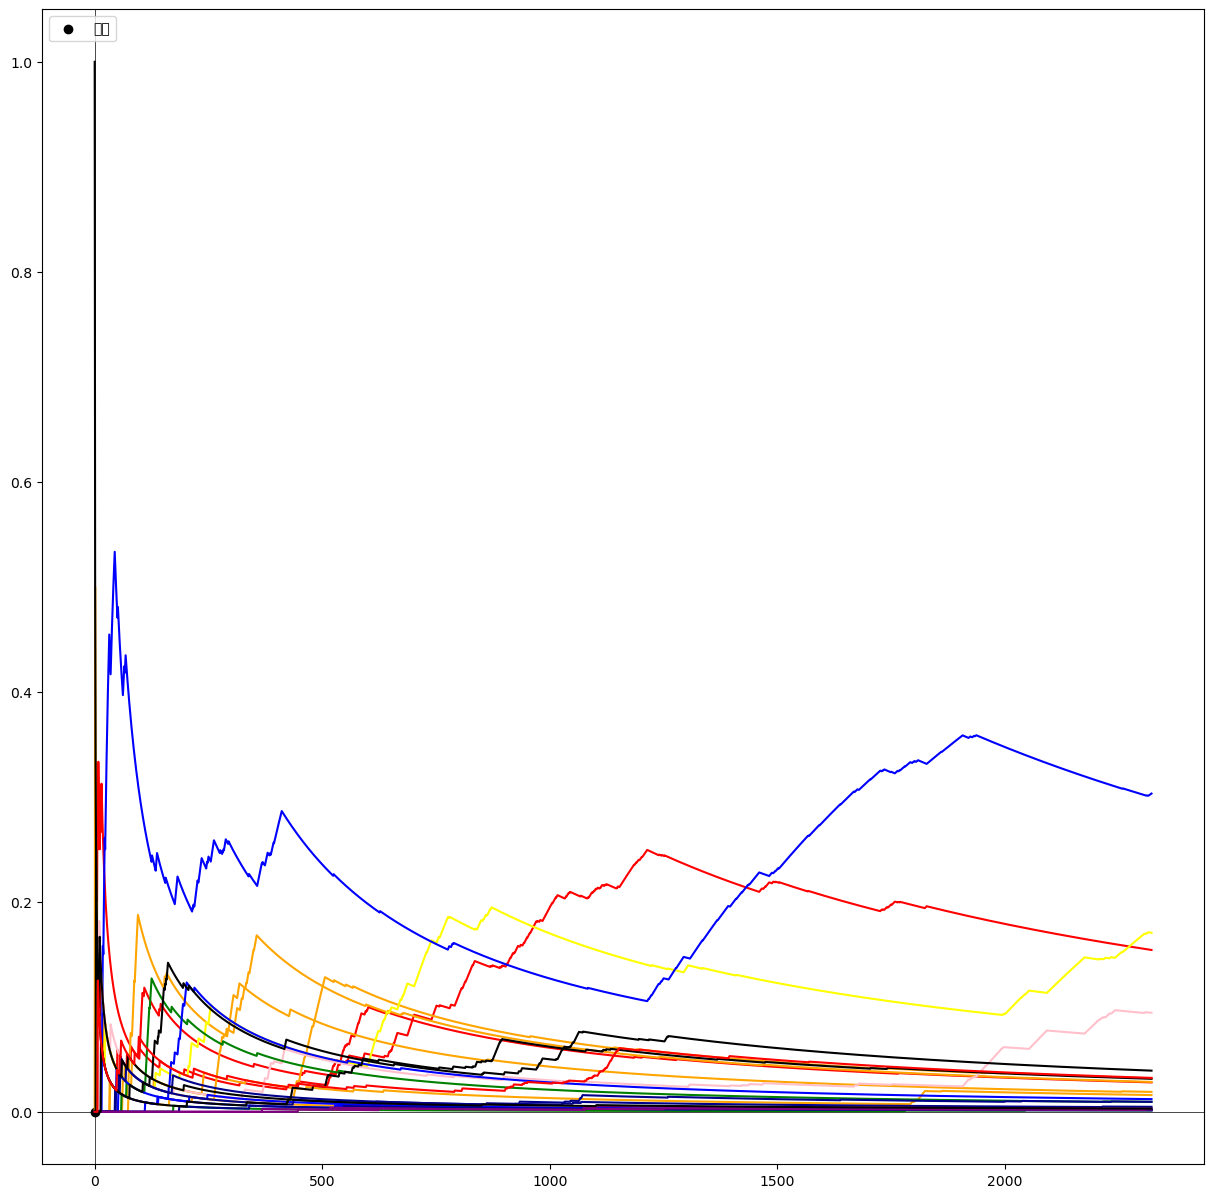

In [382]:
plt.figure(figsize=(15, 15))
plt.axhline(0, color='black',linewidth=0.5)  # x축
plt.axvline(0, color='black',linewidth=0.5)  # y축
plt.scatter(0, 0, color='black', marker='o', label='원점')  # 원점에 점 추가

plt.plot(simul_df.index, simul_df['price0'], color="red")
plt.plot(simul_df.index, simul_df['price1'], color="red")
plt.plot(simul_df.index, simul_df['price2'], color="orange")
plt.plot(simul_df.index, simul_df['price3'], color="orange")
plt.plot(simul_df.index, simul_df['price4'], color="orange")
plt.plot(simul_df.index, simul_df['price5'], color="orange")
plt.plot(simul_df.index, simul_df['price6'], color="orange")
plt.plot(simul_df.index, simul_df['price7'], color="yellow")
plt.plot(simul_df.index, simul_df['price8'], color="blue")
plt.plot(simul_df.index, simul_df['price9'], color="pink")
plt.plot(simul_df.index, simul_df['price10'], color="green")
plt.plot(simul_df.index, simul_df['price11'], color="green")
plt.plot(simul_df.index, simul_df['price12'], color="blue")
plt.plot(simul_df.index, simul_df['price13'], color="blue")
plt.plot(simul_df.index, simul_df['price14'], color="blue")
plt.plot(simul_df.index, simul_df['price15'], color="darkblue")
plt.plot(simul_df.index, simul_df['price16'], color="darkblue")
plt.plot(simul_df.index, simul_df['price17'], color="darkblue")
plt.plot(simul_df.index, simul_df['price18'], color="purple")
plt.plot(simul_df.index, simul_df['price19'], color="purple")
plt.plot(simul_df.index, simul_df['price20'], color="black")
plt.plot(simul_df.index, simul_df['price21'], color="black")
plt.plot(simul_df.index, simul_df['price22'], color="black")
plt.plot(simul_df.index, simul_df['price23'], color="red")
plt.legend(loc='upper left')
plt.show()

In [383]:
final_df = pd.read_csv("dataset/final_df.csv")
del final_df['Unnamed: 0']
final_df1 = final_df.copy()
del final_df1['open']
warnings.filterwarnings(action='ignore')
col_name =["price0","price1","price2","price3","price4","price5",\
           "price6","price7","price8","price9","price10","price11",\
            "price12","price13","price14","price15","price16","price17",\
            "price18","price19","price20","price21","price22","price23"]

start_time = 700
end_time = len(df_24h)-1

start_money = df_24h['price0'][start_time]
simul_list = [[]]

btc = [0]
money = []

for i in range(len(simul_list)):
    simul_list[i].append(start_money)
    money.append(start_money)

for j in range(start_time+1,end_time):
    index = np.argmax(simul_df.T[j-2])
    for i in range(len(simul_list)):
        if df_24h[col_name[index]][j] >= df_24h[col_name[index]][j-1] or (df_24h[col_name[index]][j]-df_24h[col_name[index]][j-1])/df_24h[col_name[index]][j-1] < -0.1:
            if money[i] != 0:
                simul_list[i].append(int(money[i]))
                btc[i] = money[i]/float(df_24h[col_name[index]][j])*0.9995
                money[i] = 0
            
            else:
               simul_list[i].append(int(btc[i]*df_24h[col_name[index]][j]))
               
        elif df_24h[col_name[index]][j] < df_24h[col_name[index]][j-1]:
            if btc[i] != 0:
                money[i] = btc[i]*float(df_24h[col_name[index]][j])*0.9995
                simul_list[i].append(int(money[i]))
                btc[i] = 0
            else:
                simul_list[i].append(int(money[i]))
print(simul_list)

[[12389000.0, 12389000, 12389000, 12389000, 12389000, 12374490, 12374490, 13029508, 13422883, 13207034, 13207034, 12920718, 12920718, 12799244, 12799244, 12799244, 12799244, 13053966, 12898001, 12898001, 12808371, 12808371, 12808371, 12808371, 12808371, 12721658, 12721658, 12721658, 12332923, 12332923, 12332923, 12332923, 12332923, 12296762, 12296762, 12296762, 12545575, 12461853, 12461853, 12461853, 12461853, 12461853, 12461853, 12407253, 12407253, 12353427, 12353427, 12353427, 12190287, 12190287, 12039219, 12039219, 12039219, 11847279, 11847279, 12180146, 12131414, 12131414, 12131414, 12131414, 12131414, 13036572, 13476389, 13317857, 13317857, 13317857, 13317857, 13469323, 13481774, 13374232, 13374232, 13207724, 13207724, 13207724, 13207724, 13207724, 13207724, 12825522, 12825522, 12825384, 12677222, 12677222, 12677222, 12714224, 12297607, 12297607, 12297607, 11606459, 11606459, 11606459, 11606459, 11606459, 11423597, 11423597, 11538101, 11788986, 11537556, 11537556, 11537556, 115375

In [305]:
final_df = pd.read_csv("dataset/final_df.csv")
final_df


,Unnamed: 0,price0,price1,price2,price3,price4,price5,price6,price7,price8,...,price15,price16,price17,price18,price19,price20,price21,price22,price23,open
0,0,0.707107,0.707107,0.707107,0.707107,0.707107,0.707107,0.707107,0.707107,0.707107,...,0.707107,0.707107,0.707107,0.707107,0.707107,0.707107,0.707107,0.707107,0.707107,2.389233
1,1,0.933465,1.203007,1.541446,1.972038,0.779973,0.506205,0.884967,0.746120,0.698707,...,0.194990,0.210833,0.281940,0.290359,0.261063,1.999878,1.335544,0.924806,0.993874,1.284905
2,2,1.332744,1.905252,4.884214,1.751899,1.090843,0.058408,1.283594,0.997474,1.000763,...,-0.115887,-0.106371,-0.064333,-0.059437,-0.076552,3.396867,3.318868,1.460083,1.477235,1.599998
3,3,8.931438,2.454421,4.230185,1.824403,1.384646,0.620721,1.818737,1.275165,0.887041,...,0.297267,0.273932,0.346533,0.362537,0.354239,2.326758,1.614713,1.609494,8.102766,9.153021
4,4,3.667847,2.613101,6.907543,2.469469,1.823900,0.983630,1.686164,1.542072,1.233965,...,1.059544,0.919524,1.260775,1.072798,1.176918,4.171310,1.900589,17.189889,2.344638,3.849815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2319,2319,0.054716,0.053761,0.042548,0.064874,0.059984,0.065012,0.070030,0.078203,0.080412,...,0.059803,0.063859,0.051376,0.064687,0.067060,0.066145,0.065060,0.048679,0.070700,0.055714
2320,2320,0.056689,0.054305,0.042009,0.066567,0.060929,0.064583,0.071246,0.077889,0.080622,...,0.058323,0.061371,0.050242,0.063632,0.066330,0.064701,0.064126,0.047755,0.069808,0.062934
2321,2321,0.055495,0.052747,0.041825,0.064720,0.059413,0.062848,0.069524,0.076514,0.077553,...,0.057914,0.061113,0.049936,0.063174,0.065848,0.064336,0.063731,0.047474,0.069286,0.056044
2322,2322,0.055136,0.052467,0.041651,0.064370,0.059018,0.062577,0.069054,0.076297,0.077166,...,0.057562,0.060866,0.049680,0.061863,0.065428,0.061897,0.061360,0.044557,0.065684,0.056821


In [379]:
simul_df

,price0,price1,price2,price3,price4,price5,price6,price7,price8,price9,...,price15,price16,price17,price18,price19,price20,price21,price22,price23,open
0,12389000.0,12389000.0,12389000.0,12389000.0,12389000.0,12389000.0,12389000.0,12389000.0,12389000.0,12389000.0,...,12389000.0,12389000.0,12389000.0,12389000.0,12389000.0,12389000.0,12389000.0,12389000.0,12389000.0,12389000.0
1,12389000.0,12389000.0,12389000.0,12389000.0,12389000.0,12389000.0,12389000.0,12389000.0,12389000.0,12389000.0,...,12389000.0,12389000.0,12389000.0,12389000.0,12389000.0,12389000.0,12389000.0,12389000.0,12389000.0,12208000.0
2,12389000.0,12389000.0,12389000.0,12389000.0,12389000.0,12389000.0,12389000.0,12389000.0,12389000.0,12389000.0,...,12389000.0,12389000.0,12389000.0,12389000.0,12389000.0,12389000.0,11651861.0,11669959.0,12389000.0,12229000.0
3,11561897.0,11630852.0,11616017.0,11648696.0,12389000.0,12389000.0,12389000.0,12389000.0,12389000.0,12389000.0,...,12389000.0,12389000.0,12389000.0,12389000.0,12389000.0,12389000.0,11651861.0,11669959.0,12389000.0,11424000.0
4,11561897.0,11630852.0,11616017.0,11648696.0,12389000.0,12389000.0,12389000.0,12389000.0,12389000.0,12389000.0,...,12389000.0,12389000.0,12493567.0,12401026.0,12307565.0,12319295.0,11544400.0,11609307.0,12317223.0,11631000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1621,108291612.0,76379679.0,50790346.0,85259280.0,66028123.0,96730247.0,67412953.0,107170146.0,133128471.0,107114602.0,...,67361751.0,71663594.0,88420154.0,90507641.0,79860304.0,78130521.0,105127785.0,69592498.0,115969414.0,58948000.0
1622,108760769.0,76462474.0,50724190.0,85780531.0,66250813.0,96714498.0,67607874.0,107170146.0,133175620.0,107001461.0,...,67118184.0,71294295.0,88217858.0,90318752.0,79720767.0,77858450.0,105027354.0,69499048.0,115671022.0,59233000.0
1623,108401740.0,76143801.0,50724190.0,85211519.0,65928630.0,96019037.0,67413426.0,106590095.0,132076762.0,107001461.0,...,67118184.0,71294295.0,88217858.0,90318752.0,79720767.0,77858450.0,105027354.0,69499048.0,115671022.0,59067000.0
1624,108401740.0,76143801.0,50724190.0,85211519.0,65928630.0,96019037.0,67413426.0,106590095.0,132076762.0,107001461.0,...,67118184.0,71294295.0,88217858.0,90153688.0,79720767.0,77275235.0,104283468.0,68734570.0,114199324.0,59323000.0


In [29]:
simul_log_df

,price0,price1,price2,price3,price4,price5,price6,price7,price8,price9,...,price15,price16,price17,price18,price19,price20,price21,price22,price23,open
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008011
2,0.014417,0.013891,0.014559,0.014046,0.019244,0.020086,0.017727,0.020514,0.023075,0.032204,...,0.030219,0.032396,0.027463,0.028686,0.029394,0.009618,0.011471,0.013514,0.013864,0.022645
3,0.017571,0.018971,0.021810,0.022610,0.021427,0.017394,0.021057,0.022307,0.024207,0.025315,...,0.012475,0.014279,0.015611,0.016667,0.015659,0.015525,0.016319,0.016394,0.017407,0.025799
4,0.027923,0.028210,0.030058,0.027110,0.027818,0.017394,0.030250,0.028759,0.027026,0.025315,...,0.012475,0.014279,0.015611,0.016667,0.015659,0.023553,0.022305,0.022189,0.025958,0.036152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2321,1.972744,1.794369,1.646844,1.936813,1.639817,1.704324,1.541554,1.896558,2.152899,1.792709,...,1.189732,1.206097,1.158671,1.149056,1.036511,1.519435,1.788241,1.391870,1.763620,1.137304
2322,1.974621,1.794839,1.646278,1.939460,1.641279,1.704253,1.542808,1.896558,2.153053,1.792250,...,1.188159,1.203853,1.157676,1.148148,1.035751,1.517920,1.787826,1.391286,1.762501,1.139398
2323,1.973185,1.793026,1.646278,1.936569,1.639162,1.701119,1.541557,1.894201,2.149455,1.792250,...,1.188159,1.203853,1.157676,1.148148,1.035751,1.517920,1.787826,1.391286,1.762501,1.138180
2324,1.973185,1.793026,1.646278,1.936569,1.639162,1.701119,1.541557,1.894201,2.149455,1.792250,...,1.188159,1.203853,1.157676,1.147354,1.035751,1.514654,1.784739,1.386483,1.756940,1.140058


In [66]:
df = pd.read_csv("dataset/btc_24h_per.csv")
df

,Unnamed: 0,price0,price1,price2,price3,price4,price5,price6,price7,price8,...,price14,price15,price16,price17,price18,price19,price20,price21,price22,price23
0,0,1.861764,1.371455,1.394376,1.603160,1.299907,1.087963,0.925497,1.319444,1.184669,...,1.104464,2.084298,1.518987,1.626202,1.441978,1.900618,2.671233,2.547191,2.941847,2.604524
1,1,3.427005,3.301995,3.460921,3.338669,4.582951,4.785894,4.218249,4.889194,5.509642,...,8.329540,7.259528,7.798685,6.581023,6.881769,7.056180,2.290416,2.727878,3.212229,3.295480
2,2,0.728960,1.176471,1.683651,1.991591,0.503944,-0.568182,0.769908,0.413853,0.261097,...,-4.537815,-3.955161,-4.037855,-2.643265,-2.681022,-3.064652,1.369565,1.122625,0.665379,0.819142
3,3,2.412281,2.150066,1.917211,1.041441,1.482450,2.549451,2.139271,1.496746,0.651042,...,3.675176,4.294208,4.404997,3.692441,3.123644,2.706799,1.865752,1.387703,1.343284,1.988454
4,4,2.526767,3.157216,2.372809,2.898862,3.243824,3.429061,3.590511,3.654627,4.851229,...,2.823180,2.808277,2.329975,2.283201,2.545225,2.867384,3.178947,3.453359,2.735115,2.096436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2320,2320,0.530382,1.382788,1.228949,0.293633,0.426494,0.060761,0.169377,-0.023665,0.551128,...,0.889643,0.426446,0.077653,0.342048,0.367890,0.508475,0.346776,0.131777,0.162165,0.874298
2321,2321,0.483477,0.158479,-0.030309,0.661702,0.387459,0.033735,0.289144,0.287429,0.035416,...,-0.412291,-0.311736,-0.465556,-0.178879,-0.158778,-0.124789,-0.298377,-0.045555,-0.084324,-0.207406
2322,2322,-0.280249,-0.366954,-0.338549,-0.613641,-0.436527,-0.669421,-0.237730,-0.441710,-0.775507,...,-0.576218,-0.486815,-0.220309,-0.020287,0.040604,-0.081045,0.185987,0.074272,0.329142,0.792484
2323,2323,0.433406,-0.636932,-0.287308,-0.377224,-0.363956,0.005093,-0.966706,-0.800975,-0.275248,...,0.016996,-0.107012,-0.069636,-0.395671,-0.082865,-0.258542,-0.649745,-0.608913,-1.001009,-1.173512


In [173]:
simul_per_df

,price0,price1,price2,price3,price4,price5,price6,price7,price8,price9,...,price15,price16,price17,price18,price19,price20,price21,price22,price23,open
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
1,-0.000001,-0.000001,-0.000001,-0.000001,-0.000001,-0.000001,-0.000001,-0.000001,-0.000001,-0.000001,...,-0.000001,-0.000001,-0.000001,-0.000001,-0.000001,-0.000001,-0.000001,-0.000001,-0.000001,1.861764
2,3.375285,3.250337,3.409169,3.286991,4.530649,4.733488,4.166139,4.836747,5.456877,7.697161,...,7.205888,7.744775,6.527717,6.828322,7.002630,2.239260,2.676495,3.160600,3.243821,3.427005
3,0.728945,1.176469,1.683653,1.991599,0.503954,-0.617901,0.769903,0.413844,0.261085,-1.573833,...,-4.003181,-4.085841,-2.691930,-2.729689,-3.113115,1.369565,1.122641,0.665379,0.819135,0.728960
4,2.412292,2.150054,1.917223,1.041436,1.482439,0.000000,2.139262,1.496747,0.651045,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.865748,1.387705,1.343296,1.988451,2.412281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2321,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.119292,-0.123617,0.500852,0.195017,...,0.376233,0.027613,0.291876,0.317706,0.458220,0.296602,0.081711,0.112084,0.823861,0.530382
2322,0.433235,0.108399,-0.130254,0.611371,0.337265,-0.016282,0.289144,0.000000,0.035416,-0.105626,...,-0.361580,-0.515322,-0.228789,-0.208698,-0.174727,-0.348227,-0.095532,-0.134282,-0.257302,0.483477
2323,-0.330109,-0.416770,0.000000,-0.663334,-0.486308,-0.719086,-0.287611,-0.541243,-0.825120,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.280249
2324,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-0.182758,0.000000,-0.749070,-0.708279,-1.099983,-1.272314,0.433406
